In [9]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset from scikit-learn
iris_sklearn = load_iris()

# Create a Pandas DataFrame from the dataset
iris = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris['species'] = iris_sklearn.target

# Display the first few rows of the dataset
iris.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

**Rows**: n_samples <br>
**Columns**: n_features <br>
Column 갯수: 축갯수 (차원 갯수) <br>

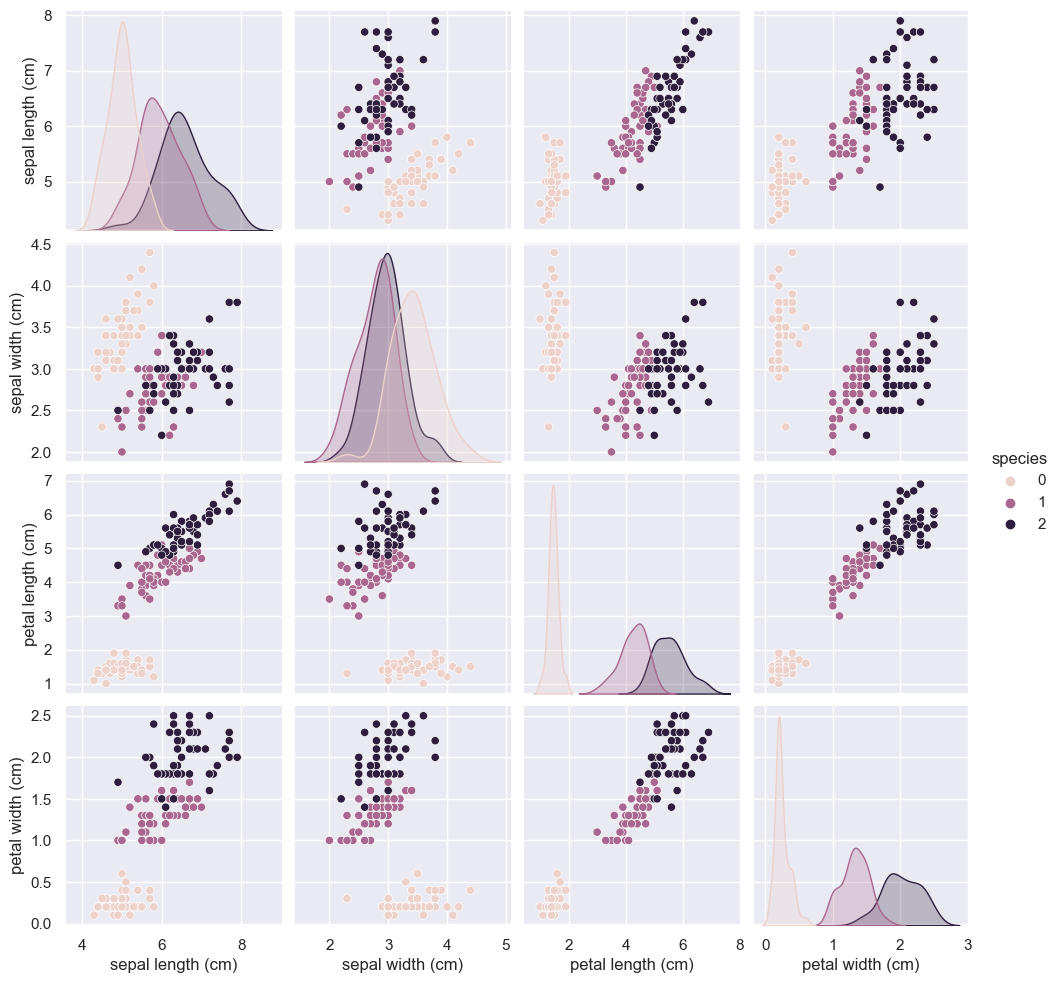

In [8]:
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
sns.pairplot(iris, hue='species', height=2.5)

# Display the plot
plt.show()

In [10]:
iris.shape

(150, 5)

In [14]:
X_iris = iris.drop('species',axis=1) # 열 삭제
y_iris  = iris['species']
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


## Scikit-Learn's Estimator API
### Basics of the API

1. Choose Model Class
```python
from sklearn.linear_model import LinearRegression
```
2. Choose model hyperparameters by instantiating this class with desired values.
```python
model = LinearRegression(fit_intercept=True)
```
3. Arrange data into a features matrix and target vector following the discussion above.
```python
X = x[:, np.newaxis] #(50,)->(50,1)
```
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
```python
model.fit(X,y)   # 객체.학습 메소드(n_samples,one feature) => a,b 찾음
model.coef_      # a, 즉 기울기
model.intercept_ # b, 즉 절편
```
5. Apply the Model to new data:
```python
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis] # x값을 [n_samples,n_features]에 맞춰야함
```
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   ```python
   yfit = model.predict(Xfit)
   ```
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.
6. Make graph:
```python
plt.scatter(x,y)
plt.plot(xfit,yfit);
```

### Supervised learning example: Simple linear regression

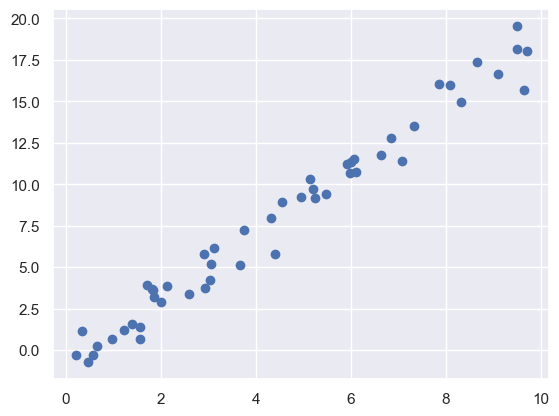

In [19]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [20]:
from sklearn.linear_model import LinearRegression as sklr

In [21]:
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]

In [24]:
model.fit(X,y)   # 객체.학습 메소드(n_samples,one feature) => a,b 찾음
print(model.coef_)      # a, 즉 기울기
print(model.intercept_) # b, 즉 절편

[1.9776566]
-0.903310725531111


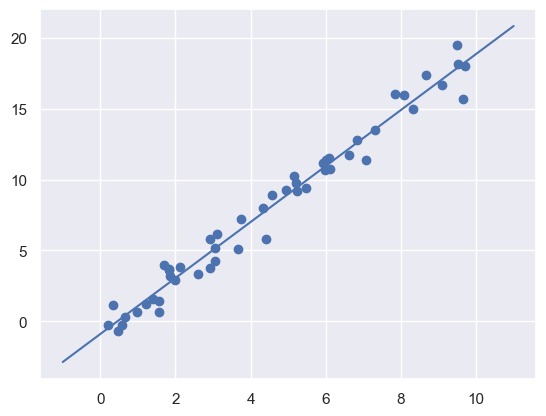

In [25]:
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis] 
yfit = model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit,yfit);

### Supervised learning example: Iris classification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset from scikit-learn
iris_sklearn = load_iris()
X_iris = iris_sklearn.data
y_iris = iris_sklearn.target

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [34]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [35]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.

In [46]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

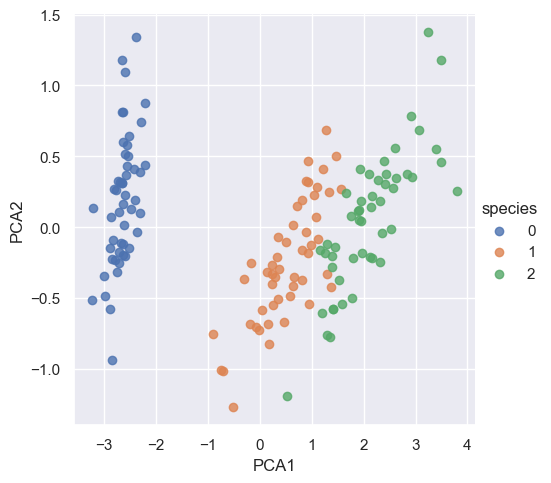

In [47]:
import seaborn as sns
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
# Create a scatter plot using seaborn
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

# 4차원(4열)에서 2차원으로 축소

### Iris Clustering

In [49]:
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

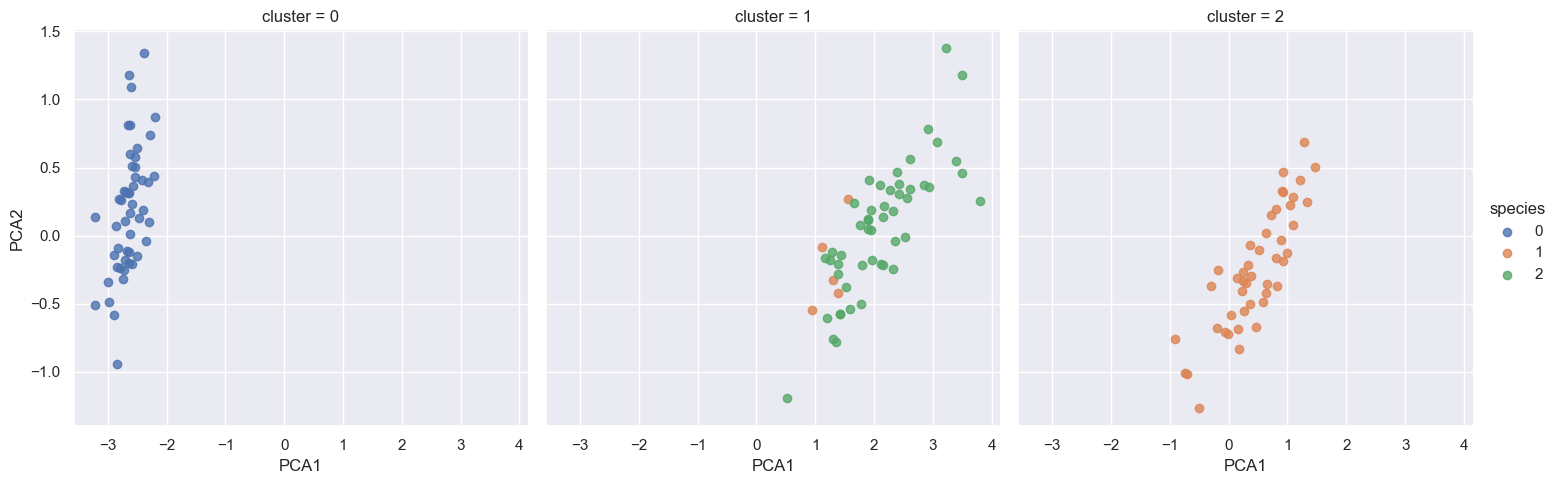

In [51]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits
### Loading and visualizing the digits data

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
#three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. 

(1797, 8, 8)

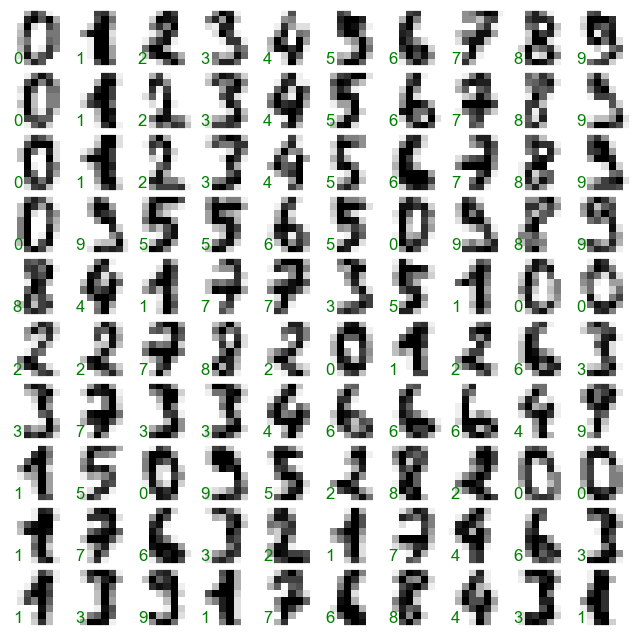

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

# Visualization of first hundred

### Unsupervised learning: Dimensionality reduction
**isomap** 다양체(manifold) 학습( 다차원->저차원)

In [59]:
from sklearn.manifold import Isomap

# Instantiate the Isomap model with a higher number of neighbors
iso = Isomap(n_components=2, n_neighbors=10)  # You can adjust the value of n_neighbors

# Fit the model to the data
iso.fit(digits.data)

# Transform the data
data_projected = iso.transform(digits.data)

# Display the shape of the transformed data
print(data_projected.shape)

(1797, 2)


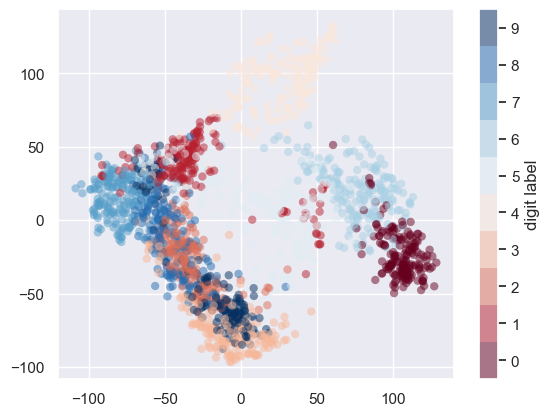

In [61]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('RdBu', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits


Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

ValueError: Unknown label type: (array([-0.7161115 , -0.29896653,  0.26520582,  0.65443493,  1.16566447,
        1.22109281,  1.4000462 ,  1.60421824,  3.21035654,  3.36710603,
        3.59937032,  3.66749887,  3.8584585 ,  4.24562734,  5.13103024,
        5.17932245,  5.80012793,  5.81548096,  6.14962364,  7.22926896,
        7.9701638 ,  8.93392551,  9.18591626,  9.40444538,  9.73011153,
       10.67206599, 10.75788366, 11.36591852, 11.3984114 , 11.51229264,
       11.74868864, 14.97193082, 15.69289556, 16.05975926, 16.66813782,
       17.38064514, 18.18565441]),)

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.

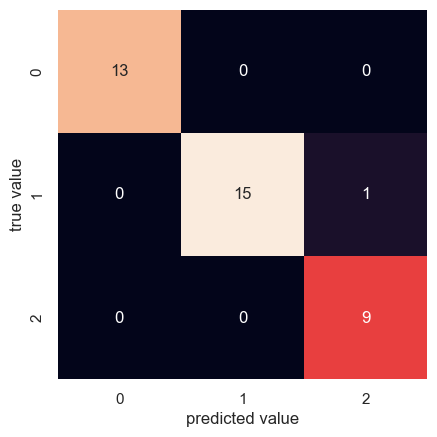

In [62]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

ValueError: cannot reshape array of size 13 into shape (8,8)

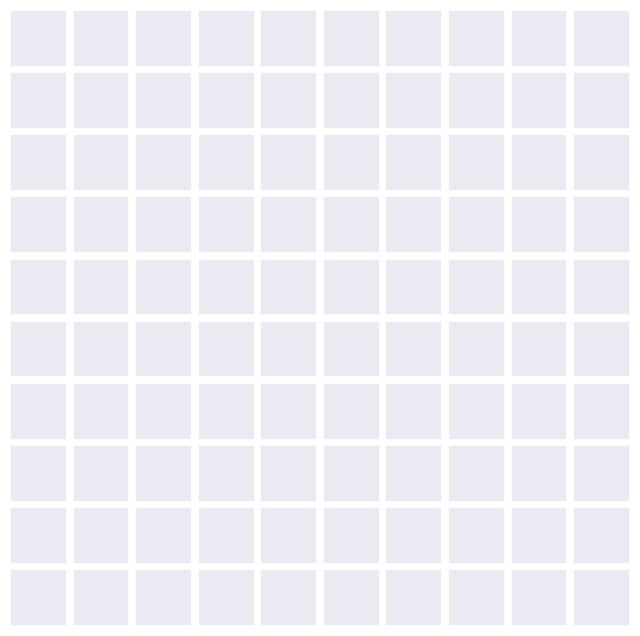

In [65]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

# 05.03 Hyperparameters and Model Validation

### Model validation the right way: Holdout sets

So what can be done?
A better sense of a model's performance can be found using what's known as a *holdout set*: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance.
This splitting can be done using the ``train_test_split`` utility in Scikit-Learn:

**K-최근접 이웃(K-Nearest Neighbor)**
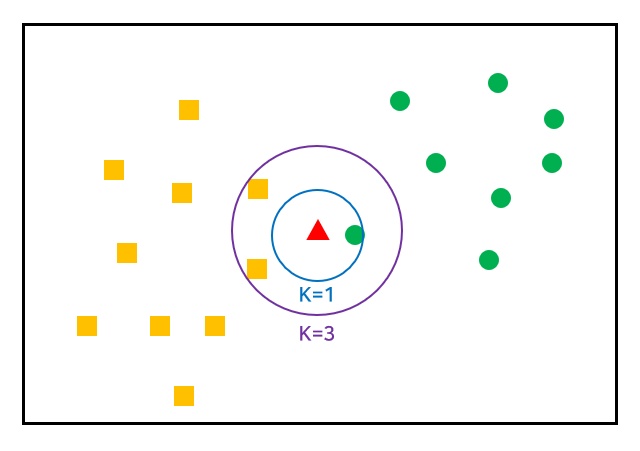

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# X란 테이블을 50%로 나누어서 각 set안에
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# 훈련데이터 입력
model.fit(X1, y1) 

# evaluate the model on the second set of data
y2_model = model.predict(X2) # y = f(X2)
accuracy_score(y2, y2_model) # |y2 - y2model| :정확도 측정

0.9066666666666666

### Model validation via cross-validation
pg.394

50%로 나누어 한쪽은 훈련, 한쪽은 validation에 사용할시 훈련데이터를 반이나 버리게 됨으로써 정확성을 떨어트린다.

해결법: 교차 검증(cross-validation) <br>

반으로 쪼개서 어느쪽을 훈련 시키고 어느쪽을 validation에 쓰느냐에 따라 결과치가 다르다 <br>
더 많이 나눌수록 측정치는 더 정확해질 수 있지만 작업량이 늘어난다
Visually, it might look something like this:
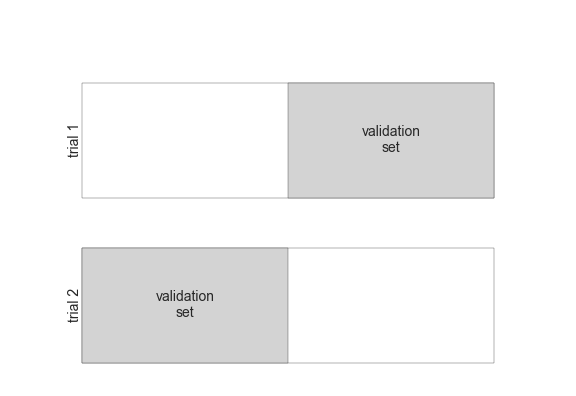![](figures/05.03-2-fold-CV.png)
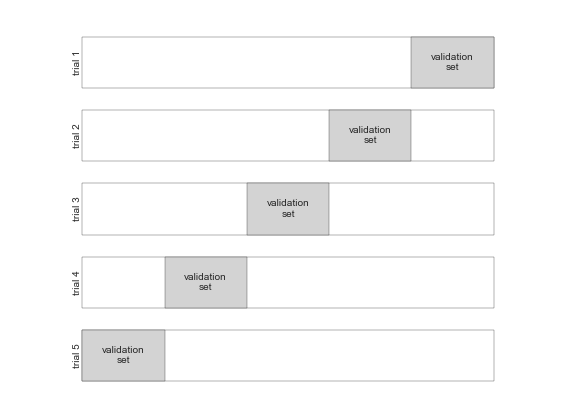

In [12]:
y2_model = model.fit(X1, y1).predict(X2) #trial 1
y1_model = model.fit(X2, y2).predict(X1) #trial 2
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

## Selecting the Best Model

Now that we've seen the basics of validation and cross-validation, we will go into a litte more depth regarding model selection and selection of hyperparameters.
These issues are some of the most important aspects of the practice of machine learning, and I find that this information is often glossed over in introductory machine learning tutorials.

Of core importance is the following question: *if our estimator is underperforming, how should we move forward?*
There are several possible answers:

- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

The answer to this question is often counter-intuitive.
In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results!
The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

### The Bias-variance trade-off

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between *bias* and *variance*.
Consider the following figure, which presents two regression fits to the same dataset:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 고편향 모델: 데이터를 **과소적합(underfit)** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 고분산 모델: 데이터를 **과적합(overfit)**
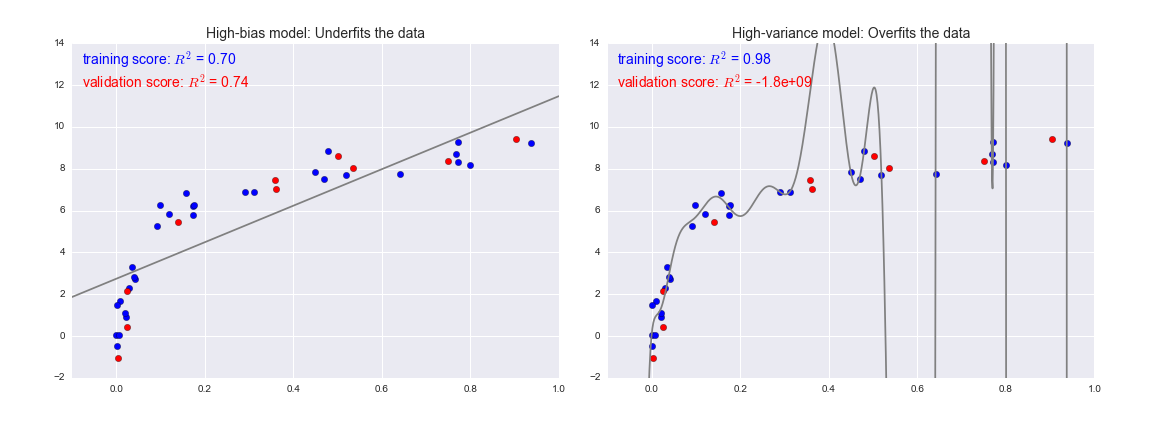

model: y=f(x)
model parameter: 기울기와 절편
https://hyen4110.tistory.com/39
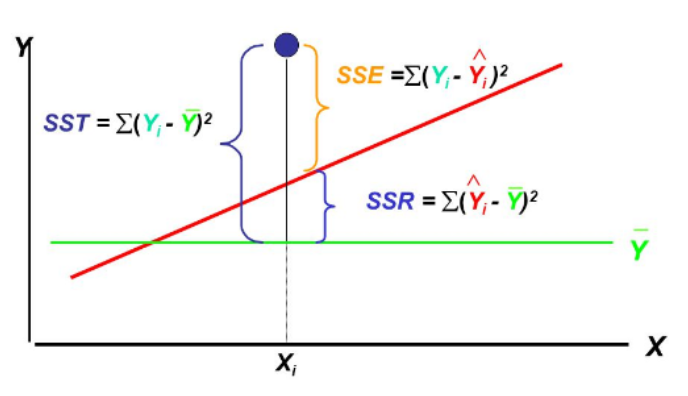
**SST(total sum of squares)**<br>
ȳ 대비 Y의 총 변동= Y의 총 변동량<br>
측정값과 평균과의 차이<br>
$$
  \sum_i \sqrt
  {x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$
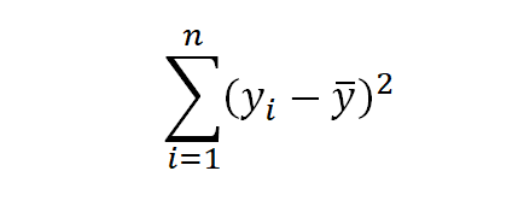

**SSR(regression sum of squares)**<br>
SST 중에서 ŷ이 Y를 설명하는 변동= X변수에 의해서 설명된 양<br>
예측값과 평균과의 차이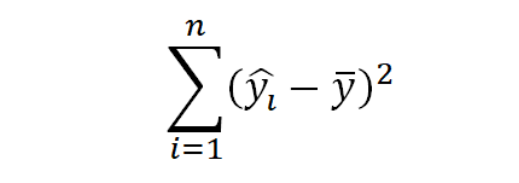

**SSE(error sum of squares)**<br>
SST 중에서 ŷ이 Y를 설명하지 못하는 변동= 에러에 의해서 설명된 양<br>
측정값과 예측값과의 차이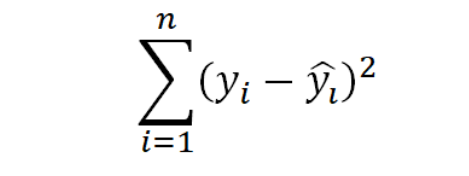

출처: https://hyen4110.tistory.com/39 [Hyen4110:티스토리]

1. 선형 회귀(Linear Regression): 선형 회귀는 종속 변수와 하나 이상의 독립 변수 간의 관계를 모델링하는 통계적 방법입니다. 기계 학습의 맥락에서는 주로 예측 분석에 사용됩니다. 목표는 입력 특성과 대상 변수 간의 최적의 선형 관계를 찾는 것입니다. (단순 선형 회귀의 경우 선, 다중 선형 회귀의 경우 초평면으로 나타낼 수 있습니다.)

2. 다항 회귀(Polynomial Regression): 다항 회귀는 선형 회귀의 확장입니다. 선형 회귀는 직선으로 관계를 모델링하는 반면, 다항 회귀는 복잡한 관계를 캡처하기 위해 다항식 함수를 사용합니다. scikit-learn의 PolynomialFeatures 클래스는 원래 특성에서 지정된 차수까지의 다항식 특성을 생성하는 데 사용됩니다.

3. make_pipeline: scikit-learn의 make_pipeline 함수는 파이프라인을 만드는 편리한 방법입니다. 파이프라인은 많은 루틴 프로세스를 간소화하는 데 사용되며, 특히 scikit-learn에서 여러 단계를 하나의 추정기로 결합하는 데 유용합니다.


4. 파이프라인 구성 요소:
- PolynomialFeatures(degree): 이 단계는 입력 데이터를 변환하여 지정된 차수까지의 다항식 특성을 추가합니다.
- LinearRegression(\**kwargs): 이 단계는 변환된 데이터에 선형 회귀 모델을 맞춥니다. \**kwargs는 LinearRegression 생성자에 추가 선택적 인수를 전달하는 데 사용됩니다.
요약하면 PolynomialRegression 함수는 다항식 특성 생성과 선형 회귀를 결합하는 scikit-learn 파이프라인을 생성하여 다항 회귀를 수행하는 편리한 방법을 제공합니다.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), # PolyFeature 주어진 차수(degree=2)의 다항식을 생성
                         LinearRegression(**kwargs)) # LinearRegression 클래스의 생성자로 선형회귀
# make-piperine(X,Y)
# X(PolyFeat)-> Y(LinRegress)

In [15]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

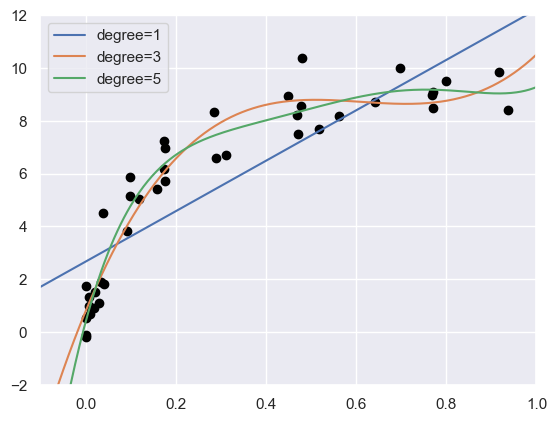

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Text(0, 0.5, 'score')

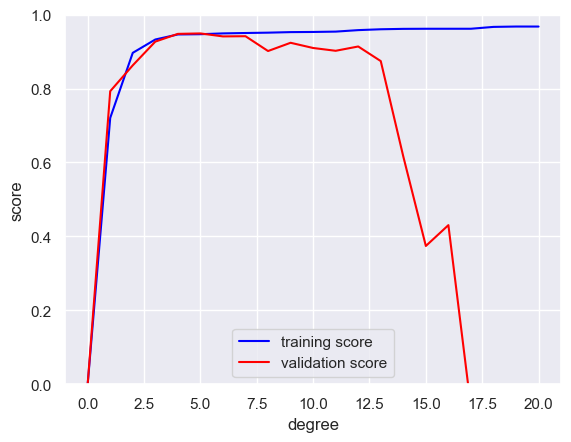

In [19]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Rest of your code remains unchanged
degree = np.arange(0, 21)

# Use validation_curve to compute training and validation scores for different polynomial degrees
param_name = 'polynomialfeatures__degree'
param_range = degree

train_score, val_score = validation_curve(
    PolynomialRegression(),  # Polynomial regression model
    X,  # Input features
    y,  # Target variable
    param_name=param_name,  # Parameter to vary (degree of PolynomialFeatures)
    param_range=param_range,  # Values of the parameter to be evaluated
    cv=7,  # Number of cross-validation folds
    scoring='explained_variance'  # You can use different scoring metrics based on your needs
)

# Plot the training and validation scores
plt.plot(param_range, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

# 모든 점을 따랐을때 검증데이타에서 과적합 문제가 발생한다

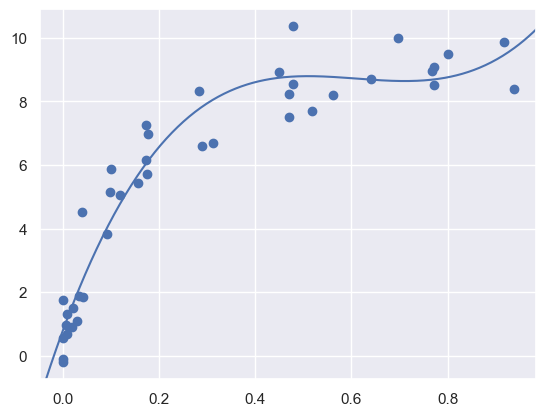

In [20]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

[One-Hot-Encoding]("https://velog.io/@pheol9166/%EC%9B%90-%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9One-hot-Encoding#:~:text=%EC%9B%90%2D%ED%95%AB%20%EC%9D%B8%EC%BD%94%EB%94%A9%EC%9D%80%20%EB%8B%A8%EC%96%B4,%EB%B0%B0%EC%97%B4%EB%A1%9C%20%ED%91%9C%ED%98%84%ED%95%9C%EB%8B%A4%EB%8A%94%20%EA%B2%83%EC%9D%B4%EC%A3%A0.")

# 05.06 In Depth: Linear Regression

(-2.887197273570064, 1.5)

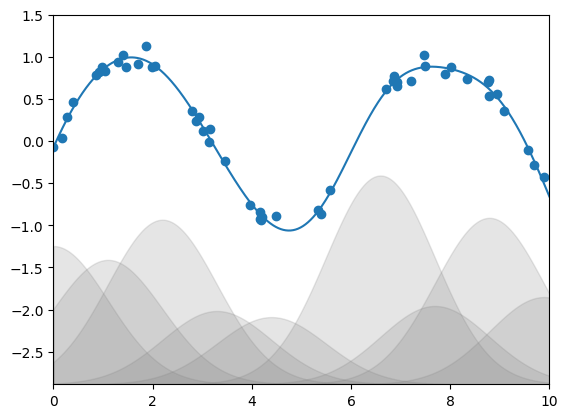

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import matplotlib.pyplot as plt

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly-spaced Gaussian Features for 1D input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

gauss_model = make_pipeline(GaussianFeatures(10, 1.0), # 너무 늘리면 과적합
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

gf = gauss_model.named_steps['gaussianfeatures']
lm = gauss_model.named_steps['linearregression']

fig, ax = plt.subplots()

for i in range(10):
    selector = np.zeros(10)
    selector[i] = 1
    Xfit = gf.transform(xfit[:, None]) * selector
    yfit = lm.predict(Xfit)
    ax.fill_between(xfit, yfit.min(), yfit, color='gray', alpha=0.2)

ax.scatter(x, y)
ax.plot(xfit, gauss_model.predict(xfit[:, np.newaxis]))
ax.set_xlim(0, 10)
ax.set_ylim(yfit.min(), 1.5)

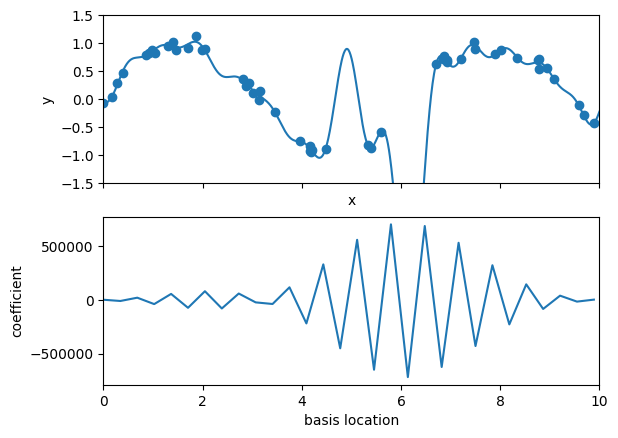

In [15]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

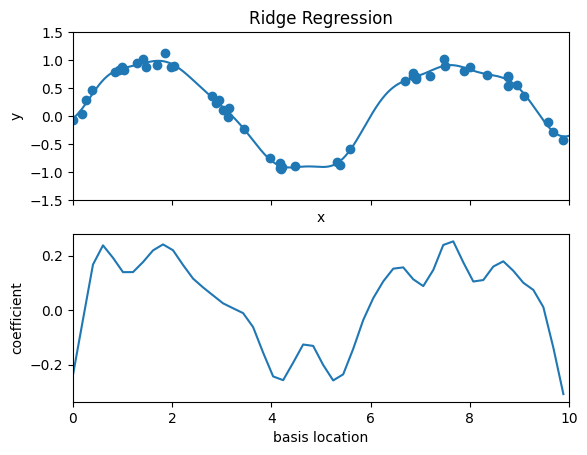

In [36]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(50), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.729e-03, tolerance: 2.065e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


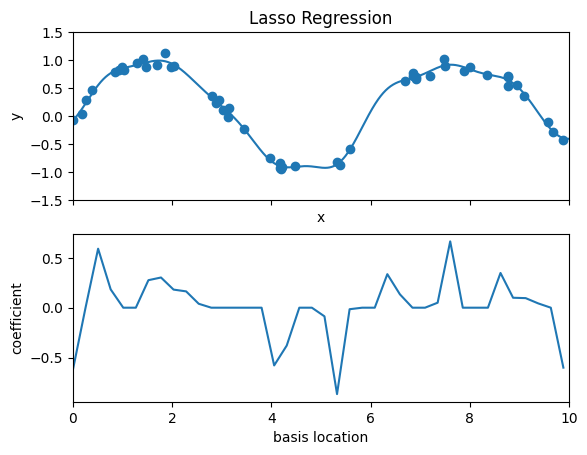

In [39]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(40), Lasso(alpha=0.0001))
basis_plot(model, title='Lasso Regression')

## Example: Predicting Bicycle Traffic

In [40]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  207k    0  207k    0     0  92675      0 --:--:--  0:00:02 --:--:-- 92708
100  815k    0  815k    0     0   259k      0 --:--:--  0:00:03 --:--:--  259k
100 1934k    0 1934k    0     0   465k      0 --:--:--  0:00:04 --:--:--  465k
100 3066k    0 3066k    0     0   613k      0 --:--:--  0:00:05 --:--:--  639k


In [41]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [42]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
    
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

(8.0, 17.0)

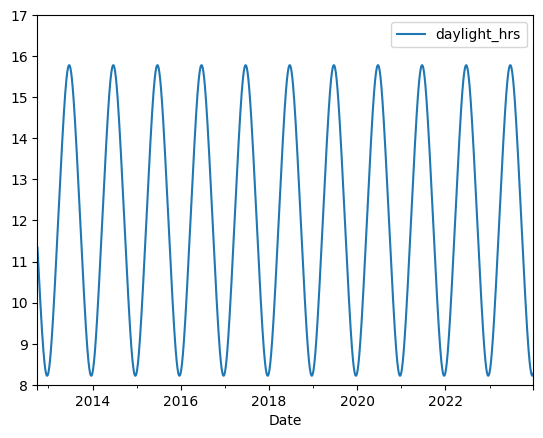

In [43]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [44]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head()

Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                           
2012-10-02  3876.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0     11.335681   
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   
2012-10-06  4012.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   

            PRCP  Temp (C)  dry day    annual  
Date                                           
2012-10-02   0.0     13.90      1.0  0.000000  
2012-10-03   0.0     13.35      1.0  0.002740  
2012-10-04   0.0     13.60      1.0  0.005479  
2012-10-05   0.0     15.30      1.0  0.008219  
2012-10-06   0.0     15.85      1.0  0.010959

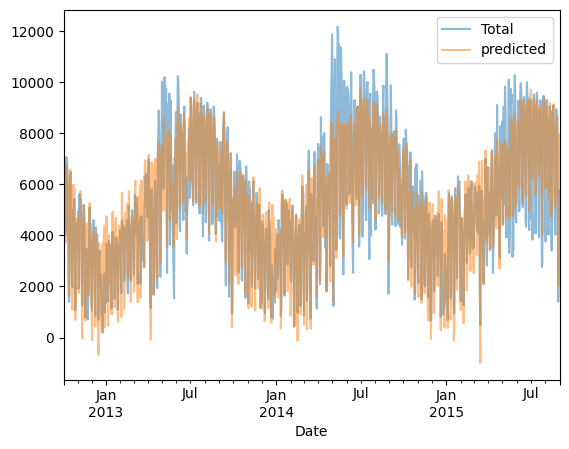

In [46]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)
daily[['Total', 'predicted']].plot(alpha=0.5);

In [47]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              995.664261
Tue             1185.010820
Wed             1171.329426
Thu              950.462501
Fri              341.655551
Sat            -2220.310481
Sun            -2280.932173
holiday        -2370.131538
daylight_hrs     259.066376
PRCP           -1329.814620
dry day         1088.251359
Temp (C)         129.633225
annual            60.954039
dtype: float64

In [48]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            996.0  173.0
Tue           1185.0  169.0
Wed           1171.0  166.0
Thu            950.0  163.0
Fri            342.0  159.0
Sat          -2220.0  161.0
Sun          -2281.0  163.0
holiday      -2370.0  327.0
daylight_hrs   259.0   17.0
PRCP         -1330.0  126.0
dry day       1088.0   68.0
Temp (C)       130.0    7.0
annual          61.0   34.0


bootstrap (memory에 있는 boot block을 시동(booting)거는것)

Resampling 표본 재추출: original source data에서 표본을 랜덤으로 뽑고(sampling) 다시 넣으면서 표본 크기를 늘리는것

# 05.07 In-Depth: Support Vector Machines

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

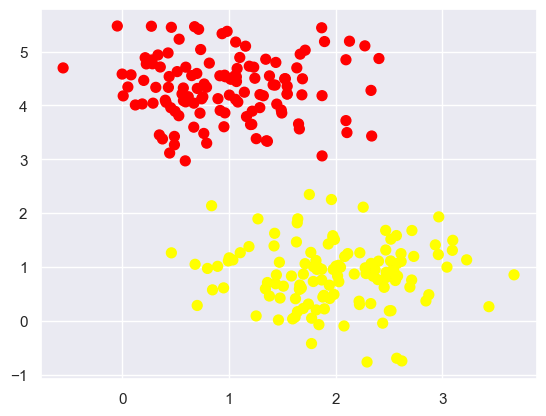

In [94]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=2, # 그룹 수
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

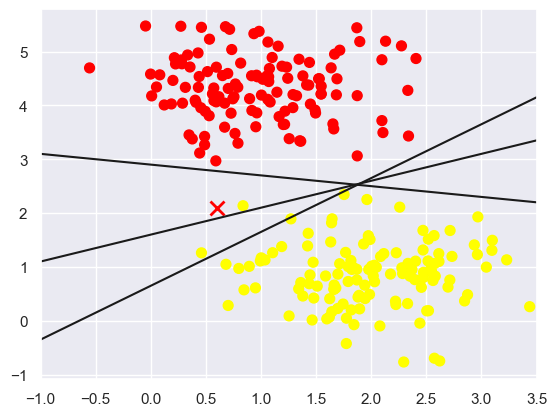

In [95]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

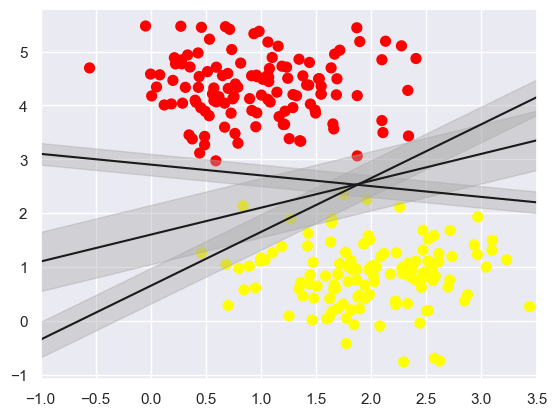

In [96]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [97]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [98]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, color='black',facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

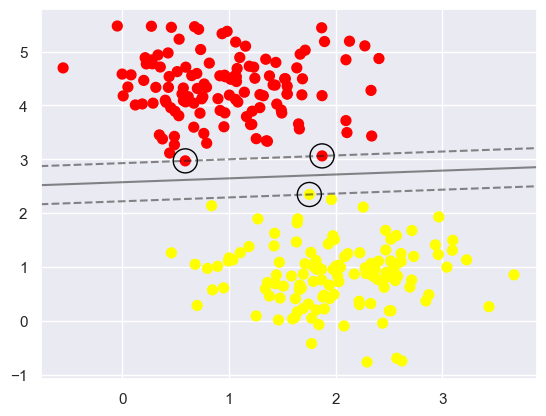

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
#최대한 점선 사이가 넓은 것이 도움이 된다
# n_sample 수가 변해도 경계선과 서포트 벡터에 무감각

In [91]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


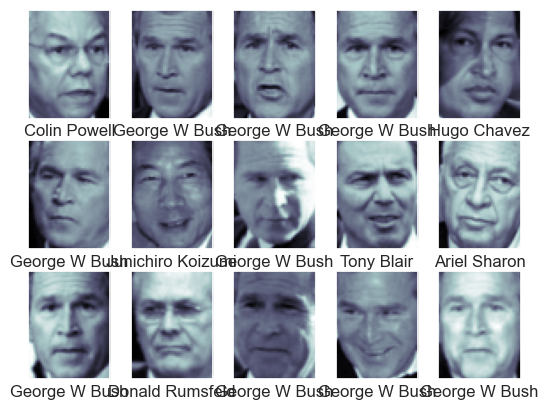

In [100]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [104]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# 사람을 분류하는 주성분 픽셀 150개를 뽑는다
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [107]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [108]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 18.1 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [109]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

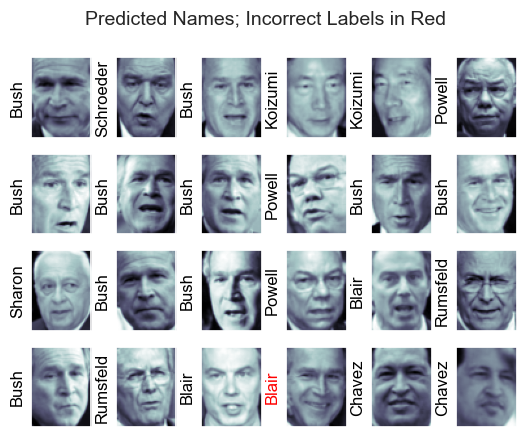

In [110]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [111]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [112]:
import numpy as np

def calculate_support(y_true):
    unique_classes, class_counts = np.unique(y_true, return_counts=True)
    support_per_class = dict(zip(unique_classes, class_counts))
    return support_per_class

# Example usage:
y_true_example = np.array([0, 1, 0, 1, 1, 0, 1, 0])
support_per_class_example = calculate_support(y_true_example)
print("Support for each class:", support_per_class_example)


Support for each class: {0: 4, 1: 4}


# 05.08 In-Depth: Decision Trees and Random Forests

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


## Motivating Random Forests: Decision Trees

Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.
For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:

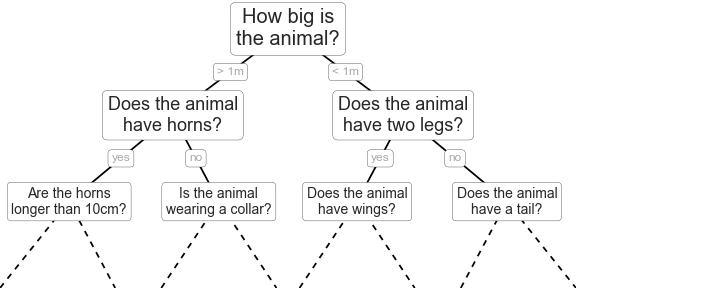

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.
The trick, of course, comes in deciding which questions to ask at each step.
In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.
Let's now look at an example of this.

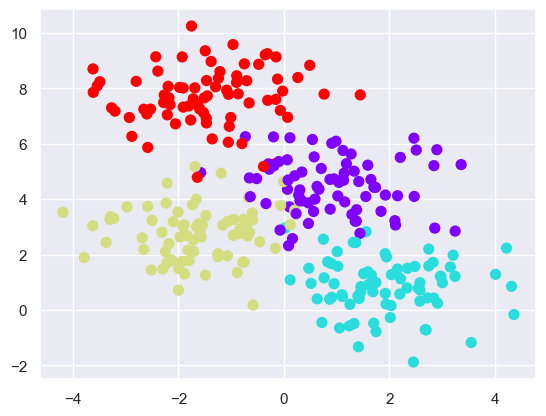

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, # 중심 4개
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='rainbow');

C:\Users\user\AppData\Local\Temp\ipykernel_7644\86163124.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


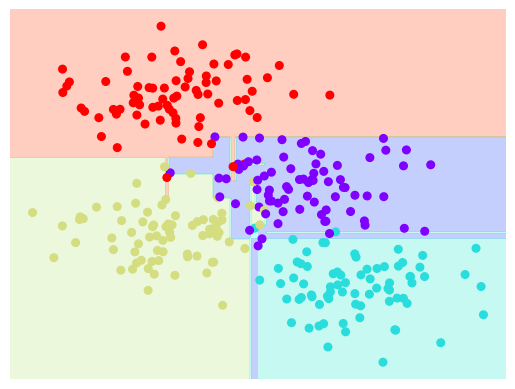

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
visualize_classifier(DecisionTreeClassifier(), X, y)

1. Guess some cluster centers
2. Repeat until converged
    1. E-step: Assign points to the nearest cluster center
    2. M-step: set cluster centers to the mean of their assigned points 

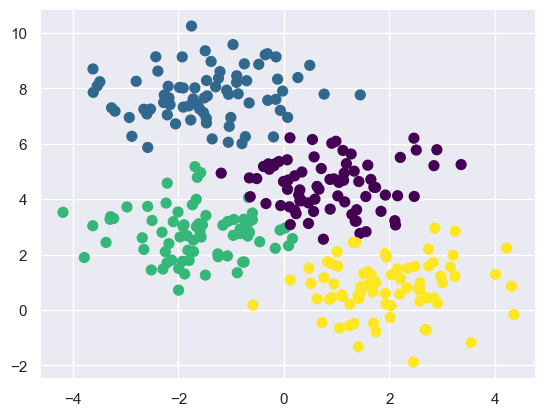

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

- 하지만 임의의 난수 갯수를 미리 지정해야한다. 군집을 갯수를 알아낼 수 없다
- 결과가 의미가 있는지에 확신이 없다
- 선형 형태임으로 비선형인 군집을 잘 나눌 수 없다

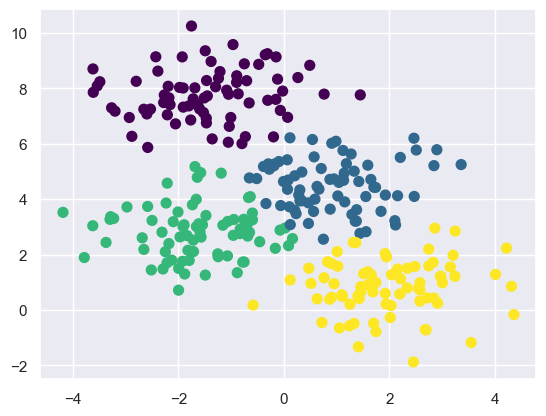

In [9]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


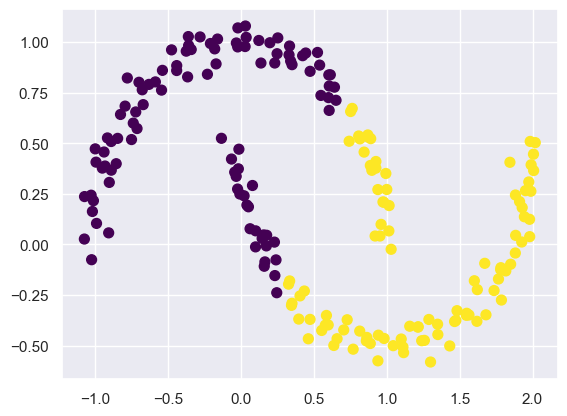

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


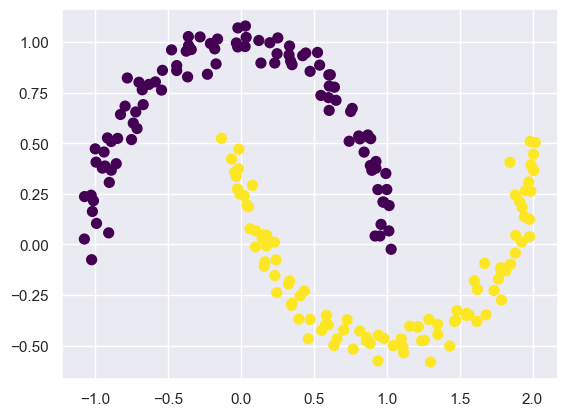

In [14]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', # affine: 커널 변환
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
# 각각 10개의 군집마다 mean

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

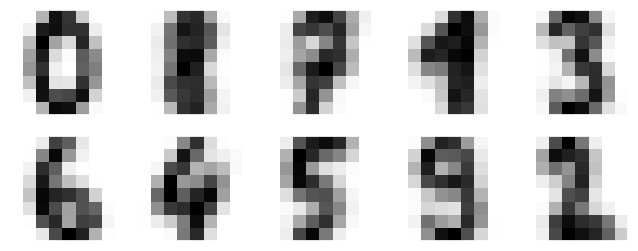

In [21]:
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat,centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [24]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
mask

array([False, False, False, ..., False, False, False])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

Text(110.44999999999997, 0.5, 'predicted label')

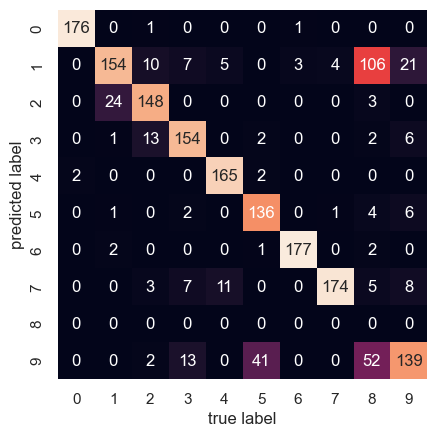

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

T-SNE t분포? https://direction-f.tistory.com/32

t 분포를 활용한 검정방안은 표본의 크기가 충분하지 않고 모집단의 분산을 알기 어려울 때 적용하는 방안입니다.
샘플이 적어서 정규분포를 따르지 않는다

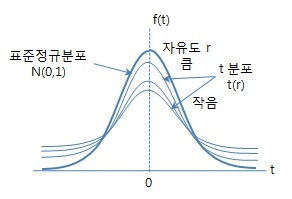

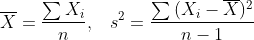

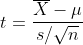

**SNE (Stochastic Neighbor Embedding)** <br>
Stochastic: random probability<br>
Embedding : 3차원을 2차원으로<br>
p(x): 확률 밀도 함수 <br>
밀도 함수 간의 거리<br>

[계산식](https://devhwi.tistory.com/20) <br>
[설명과 예시](https://velog.io/@swan9405/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-T-SNE-T-distributed-Stochastic-Neighbor-Embedding)

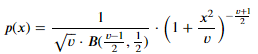 <br>
t-분<br>
포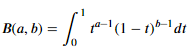 <br>


v: 자유도, B : 베타 <br>

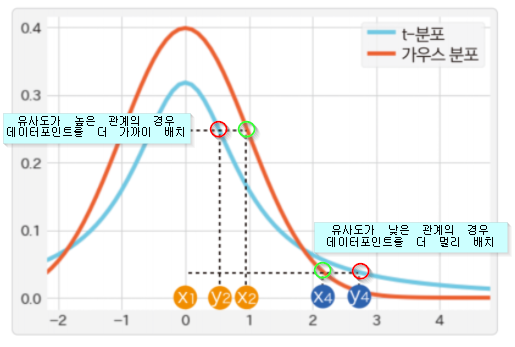 함수

In [37]:
from sklearn.manifold import TSNE

#project the data
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

print(digits.data)
print(digits_proj)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ -1.8358123  -58.570076  ]
 [ 11.871401    10.429434  ]
 [ -0.25482196  -8.208184  ]
 ...
 [ -3.974351     1.6618674 ]
 [-35.413857    -2.0271342 ]
 [ -9.016847    -1.5020137 ]]


In [40]:
#Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
print(clusters)

[6 8 7 ... 7 9 7]


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
#Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
print(labels)
print(digits.target)

[0 1 8 ... 8 9 8]
[0 1 2 ... 8 9 8]


In [45]:
#Compute accuracy
accuracy_score(digits.target, labels)

0.9415692821368948

## k-means for color compression

In [47]:
#!pip install pillow

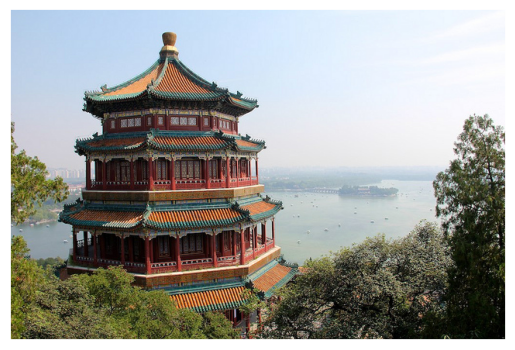

In [49]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [50]:
china.shape
# image size(427 * 640) with RGB

(427, 640, 3)

In [53]:
data = china / 255.0 # use 0..1 scale
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [55]:
def plot_pixels(data, title, colors=None, N=10000): # 만개를 뽑음
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T

    fig,ax = plt.subplots(1,2,figsize=(16,6)) 
    ax[0].scatter(R,G,color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

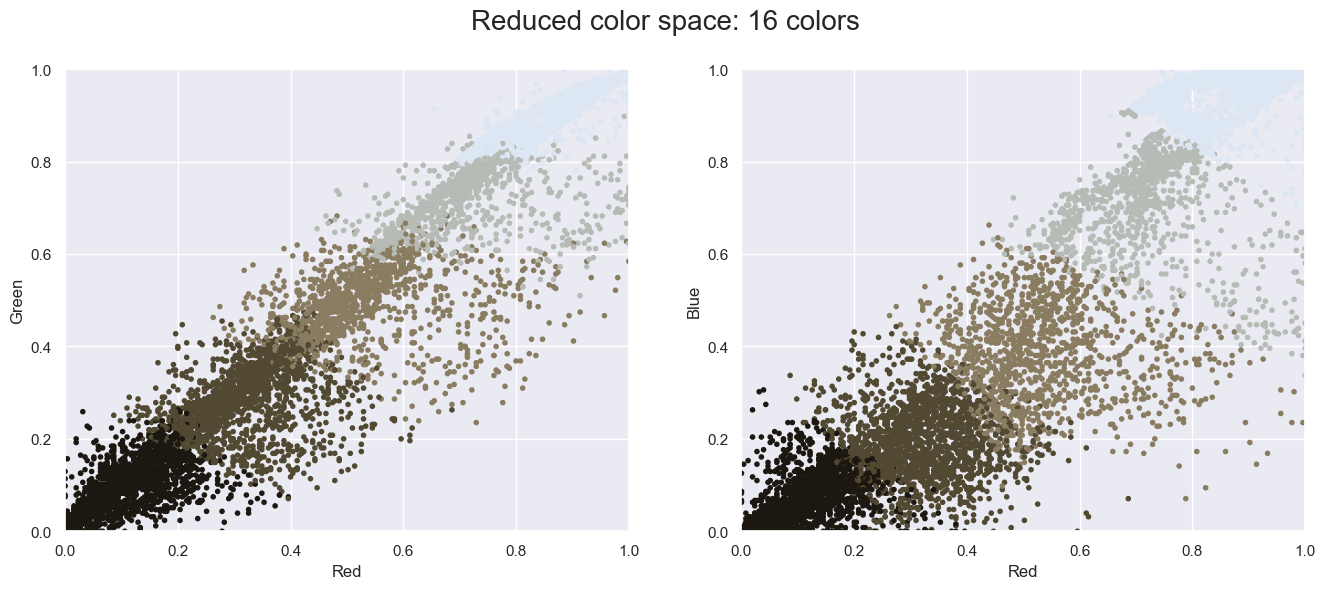

In [70]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(5) # 16 million to 16 colors
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
# 16 miliion color to 16개의 색, using k-means
kmeans = MiniBatchKMeans(3) # 색 종류
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

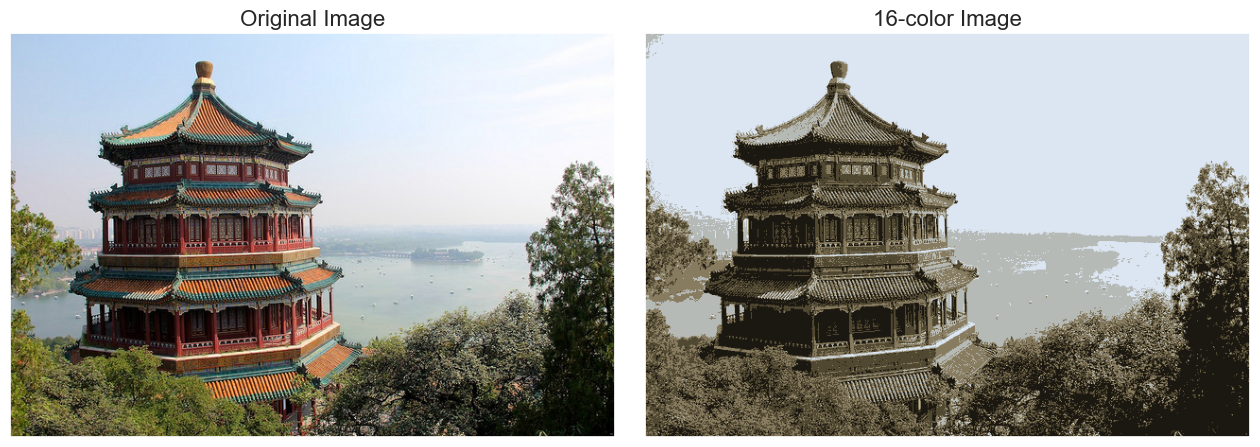

In [71]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

## k-평균의 취약점

- k-평균
    - 군집의 포인트와 군집의 무게중심간의 거리를 계산
- t-sne
    - 밀도값 차이?  
- 군집의 중간에서 원형이 위치하는것과 비슷하다. 군집 모양을 인지할 수 없다
- 불확실성을 인지할 수 없다
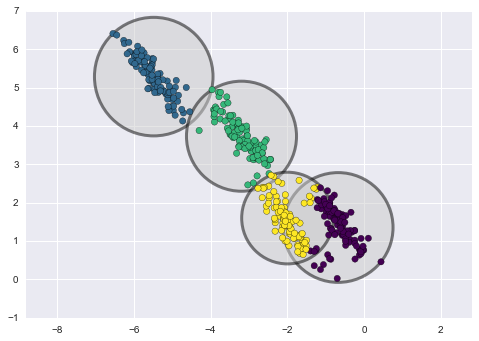

# 05.12 Gaussian Mixture Models
https://skirttt.com/14-%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88-%ED%98%BC%ED%95%A9-%EB%AA%A8%EB%8D%B8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/

- Expectation 단계: E 단계에서는 현재의 모델 파라미터를 가정하고, 각 데이터 포인트가 각 가우시안 성분에 얼마나 속하는지를 계산합니다. 이를 ‘소속도’라고 하며, 이는 사실상 각 데이터 포인트에 대한 가우시안 성분의 ‘소프트’ 할당입니다.- 
Maximization 단계: M 단계에서는 E 단계에서 계산한 소속도를 바탕으로 모델의 파라미터 (각 가우시안 성분의 평균과 공분산)를 업데이트합니다.

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

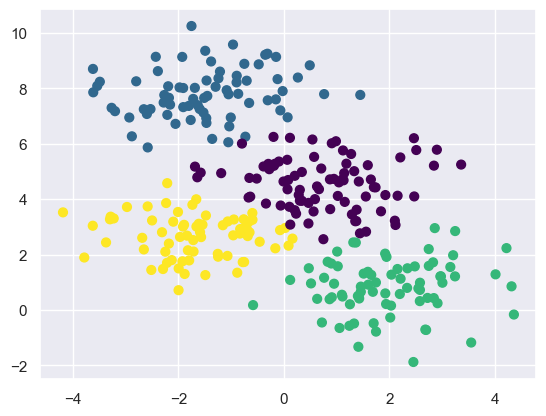

In [106]:
from sklearn.mixture import GaussianMixture

# Your code continues...
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

[[0.433 0.    0.027 0.54 ]
 [0.003 0.997 0.    0.   ]
 [0.998 0.002 0.    0.   ]
 [0.001 0.999 0.    0.   ]
 [0.415 0.    0.337 0.248]]


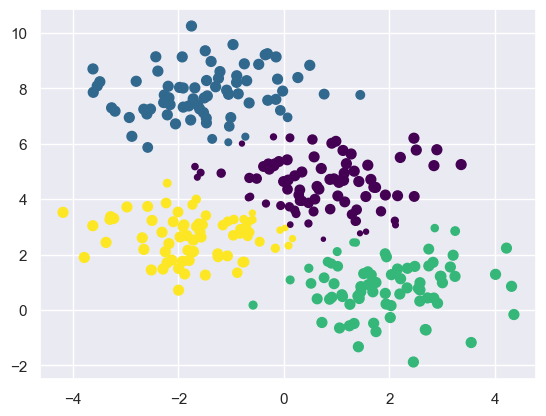

In [107]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [161]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None,  **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ellipse = Ellipse(position[nsig-1], nsig * width, nsig * height, angle, **kwargs)
        ax.add_patch(ellipse)


In [162]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse( pos, covar, ax,alpha=w * w_factor, facecolor='none', edgecolor='black')

In [163]:
gmm.weights_
U, s, Vt = np.linalg.svd(gmm.covariances_)
angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
angle

array([-63.85722398, -21.5513711 ])

In [164]:
Ellipse(gmm.means_, nsig * width, nsig * height, angle, **kwargs)

NameError: name 'nsig' is not defined

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

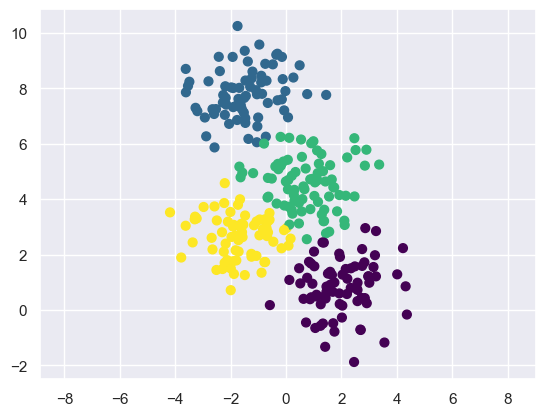

In [165]:
gmm = GaussianMixture(n_components=4,covariance_type='full', random_state=42)
plot_gmm(gmm, X)

In [125]:
Ellipse.__init__()

TypeError: Ellipse.__init__() missing 4 required positional arguments: 'self', 'xy', 'width', and 'height'

In [130]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

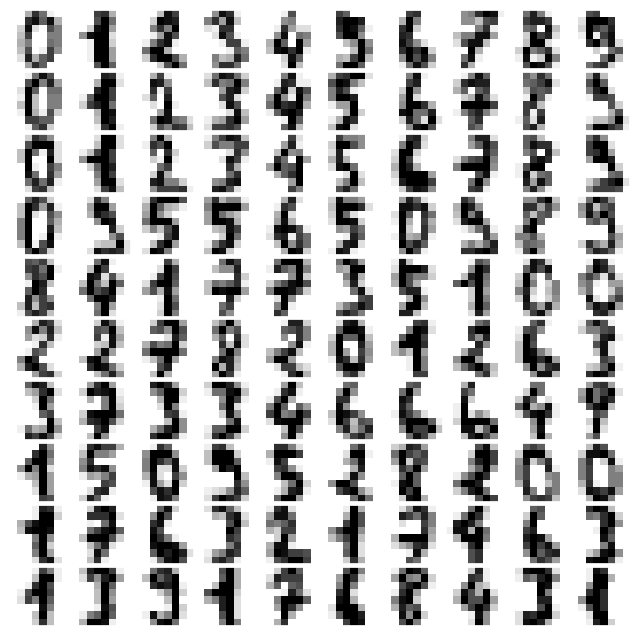

In [131]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [132]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

True


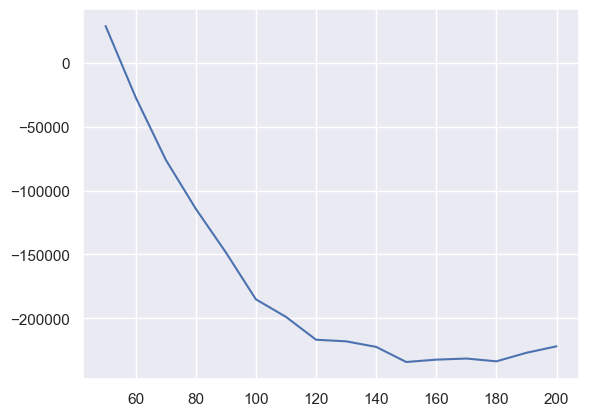

In [135]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [139]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [140]:
data_new = gmm.sample(100, random_state=0)
data_new.shape

TypeError: BaseMixture.sample() got an unexpected keyword argument 'random_state'

In [138]:
# 생성형 AI
data_new = gmm.sample(100)
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 100) + inhomogeneous part.

Density Estimation (밀도 추정)

Parameteric: 모수, 평균 분산 <br>
Non-parameteric: 비모수 <br>
histogram

### Kernel Function
https://sungkee-book.tistory.com/2 <br>
histogram -> 곡선화 <br>
1. 면적이 1
2. 좌우대칭
3. non-negative
ex) x -> x^2
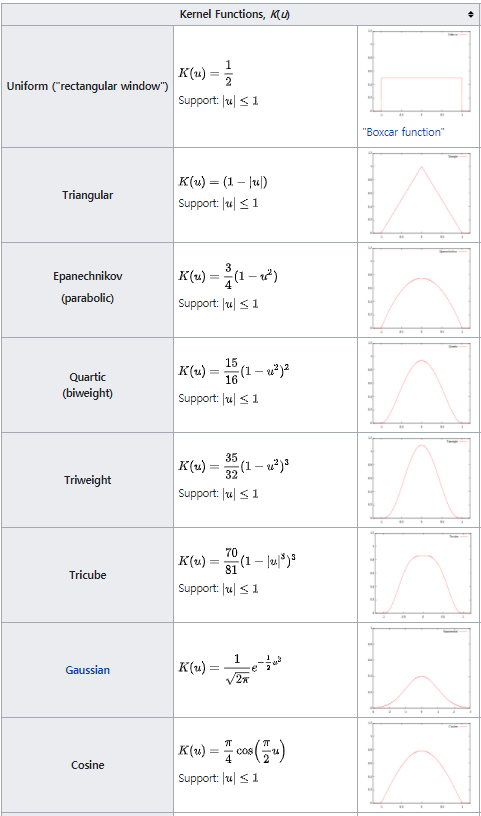

**KDE 수식**
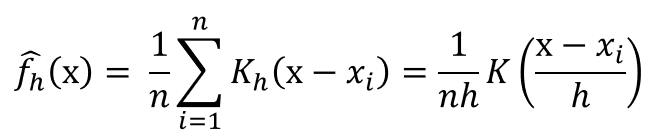

위의 수식에서 h값이 대역폭(bandwidth)를 결정하는 파라미터이다. 대역폭은 확률밀도함수를 스무딩(smoothing)하는 역할을 하며, 대역폭의 값이 작을수록 KDE의 모양이 뾰족하고 클수록 완만한 형태를 띠게 된다.

빨간색 선: h=0.05 <br>
검은색 선: h=0.3 <br>7
초록색 선: h <br>

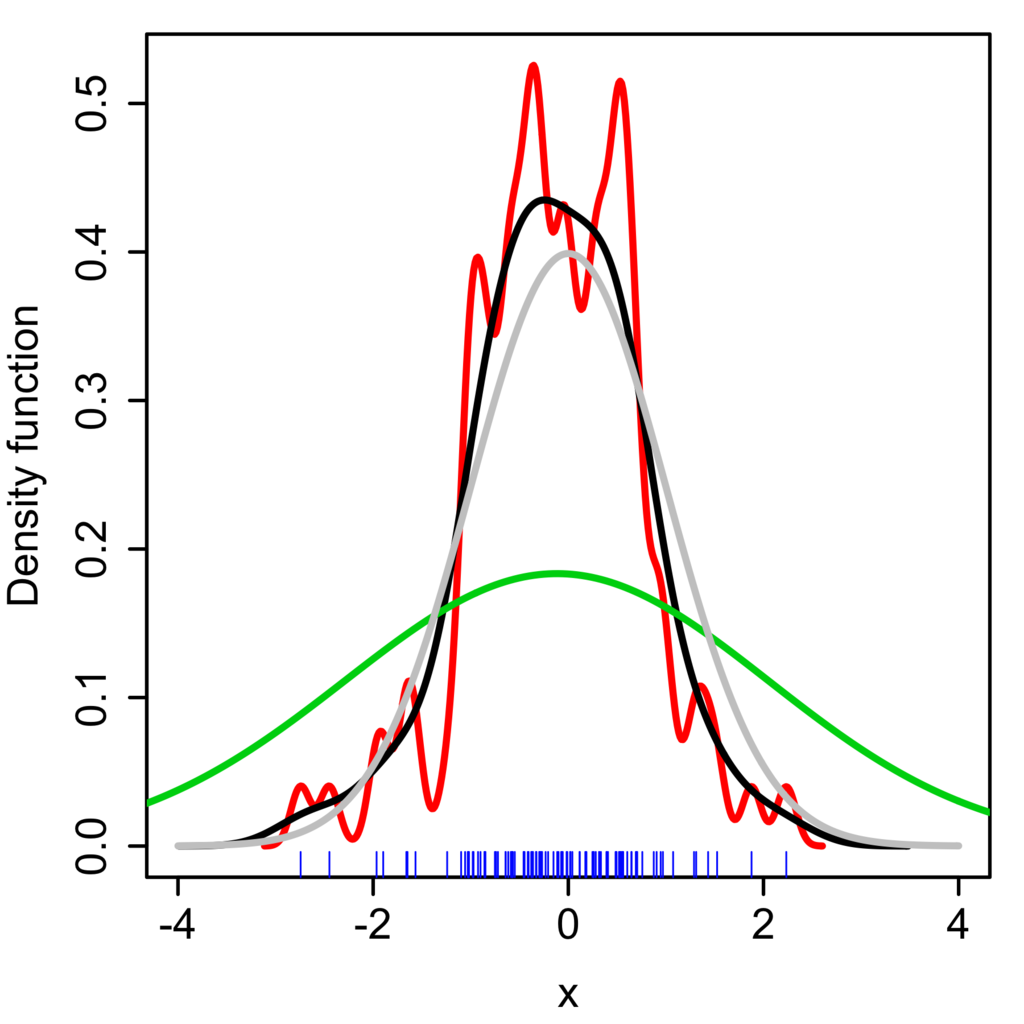

파란색 실선: 커널 밀도 추정 결과 <br>
초록색 실선: 각 데이터 값의 커널 함 <br>수
빨간색 눈금: 각 데이터 값의  <br>
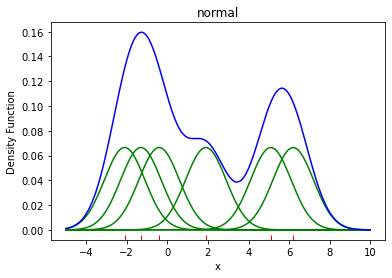위치=2

In [166]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
# 커널 밀도 함수 계산식: 0.5 는 반경
# xi에 대하여 커널을 적용하여 확률 빈도를 추정 sum() =>  본래의 histogram과 비슷하게 만듬
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);

NameError: name 'x' is not defined

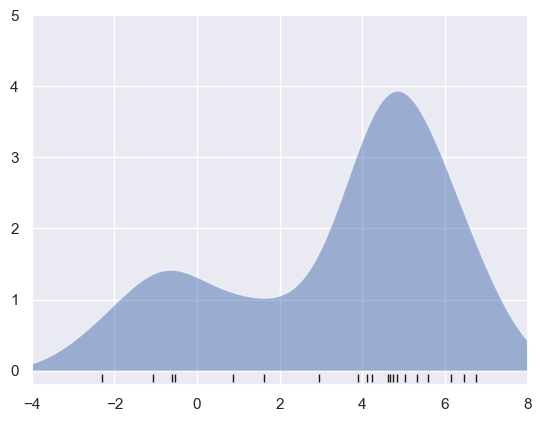

In [171]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
#norm(xi) 는 생성된 정규 분포 객체
#pdf 는 확률 밀도 함수 => 가우스 커널
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

(-0.02, 0.22)

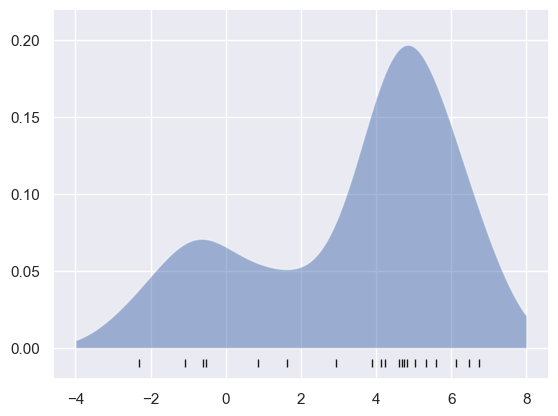

In [175]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
# h =1 , Kernel func = gaussian
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

[morphology](https://bkshin.tistory.com/entry/OpenCV-19-%EB%AA%A8%ED%8F%B4%EB%A1%9C%EC%A7%80Morphology-%EC%97%B0%EC%82%B0-%EC%B9%A8%EC%8B%9D-%ED%8C%BD%EC%B0%BD-%EC%97%B4%EB%A6%BC-%EB%8B%AB%ED%9E%98-%EA%B7%B8%EB%A0%88%EB%94%94%EC%96%B8%ED%8A%B8-%ED%83%91%ED%96%87-%EB%B8%94%EB%9E%99%ED%96%87)

In [178]:
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  6.74481176,  4.2387931 ,  5.3190391 ,  4.75062962,
        6.46210794,  2.93985929,  4.6775828 ,  4.61594565,  6.13376944,
        3.90010873,  4.82757179,  4.12214158,  5.04221375,  5.58281521])

In [179]:
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection  import LeaveOneOut
import numpy as np

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);

In [180]:
grid.best_params_

{'bandwidth': 1.1233240329780276}